Import Library

In [135]:
import os
import cv2
import numpy as np
from tabulate import tabulate
from sklearn import preprocessing
from skimage.feature import graycomatrix, graycoprops

Directory

In [136]:
image_directory_training="../Dataset/augmentation_image/2_label/dataset_training"
image_directory_testing="../Dataset/augmentation_image/2_label/dataset_testing"

GLCM Atribut

In [137]:
#scenario GLCM properties
glcm_properties = ['contrast']
# glcm_properties = ['dissimilarity', 'correlation', 'homogeneity']
# glcm_properties = ['dissimilarity', 'correlation', 'contrast']
# glcm_properties = ['dissimilarity', 'homogeneity', 'contrast']
# glcm_properties = ['correlation', 'homogeneity', 'contrast']
# glcm_properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast']
angles = [0, 45, 90, 135]
distance = [3]

Ekstraksi Fitur HSV + GLCM

In [138]:
def ef_hsv_glcm_training(image_directory_training):

    # membuat list untuk menyimpan hasil ekstraksi fitur
    features_training = []

    # melakukan ekstraksi fitur pada setiap folder
    for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

        # mengambil semua file gambar di dalam folder
        image_files = [f for f in files if f.endswith('.jpg')]

        # melakukan ekstraksi fitur pada setiap gambar
        for image_file in image_files:
            # membaca gambar
            image = cv2.imread(os.path.join(root, image_file))

            # mengubah gambar ke dalam format HSV
            hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

            # mengambil nilai hue (H) dari gambar
            hue = hsv[:, :, 0]

            # mengambil nilai saturation (S) dari gambar
            saturation = hsv[:, :, 1]

            # mengambil nilai value (V) dari gambar
            value = hsv[:, :, 2]

            # Hitung matriks glcm
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, distances=distance, angles=[
                                0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

            # Hitung fitur glcm
            feature_glcm = []
            glcm_props = [
                propery for name in glcm_properties for propery in graycoprops(glcm, name)[0]]
            for item in glcm_props:
                feature_glcm.append(item)

            #menambahkan semua fitur ke list
            features_training.append([np.mean(hue), np.mean(
                saturation), np.mean(value)] + feature_glcm + [a])

    return features_training


def ef_hsv_glcm_testing(image_directory_testing):

    # membuat list untuk menyimpan hasil ekstraksi fitur
    features_testing = []

    # melakukan ekstraksi fitur pada setiap folder
    for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

        # mengambil semua file gambar di dalam folder
        image_files = [f for f in files if f.endswith('.jpg')]

        # melakukan ekstraksi fitur pada setiap gambar
        for image_file in image_files:
            # membaca gambar
            image = cv2.imread(os.path.join(root, image_file))

            # mengubah gambar ke dalam format HSV
            hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

            # mengambil nilai hue (H) dari gambar
            hue = hsv[:, :, 0]

            # mengambil nilai saturation (S) dari gambar
            saturation = hsv[:, :, 1]

            # mengambil nilai value (V) dari gambar
            value = hsv[:, :, 2]

            # Hitung matriks glcm
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, distances=distance, angles=[
                                0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

            # Hitung fitur glcm
            feature_glcm = []
            glcm_props = [
                propery for name in glcm_properties for propery in graycoprops(glcm, name)[0]]
            for item in glcm_props:
                feature_glcm.append(item)

            #menambahkan semua fitur ke list
            features_testing.append([np.mean(hue), np.mean(
                saturation), np.mean(value)] + feature_glcm + [a])

    return features_testing


Inisialisasi Data Training

In [139]:
#NORMALISASI DATA 
extraction_feature = ef_hsv_glcm_training(image_directory_training)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l2")

# Menggabungkan data dan label
train_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    train_data.append(result_row)

In [140]:
# train_data = ef_hsv_glcm_training(image_directory_training)

In [141]:
# header tabel hsv glcm
header = ["Hue (H)", "Saturation (S)", "Value (V)"] + [f'{prop} {angle}' for prop in glcm_properties for angle in angles] + ["Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(train_data, headers=header, tablefmt="grid"))

+--------------+---------------+---------------+----------------+---------+
|   contrast 0 |   contrast 45 |   contrast 90 |   contrast 135 |   Label |
+==============+===============+===============+================+=========+
|     0.552198 |      0.509356 |      0.462604 |       0.470778 |       1 |
+--------------+---------------+---------------+----------------+---------+
|     0.54366  |      0.500541 |      0.495099 |       0.456913 |       1 |
+--------------+---------------+---------------+----------------+---------+
|     0.530767 |      0.48557  |      0.496178 |       0.486124 |       1 |
+--------------+---------------+---------------+----------------+---------+
|     0.496178 |      0.486124 |      0.530767 |       0.48557  |       1 |
+--------------+---------------+---------------+----------------+---------+
|     0.373451 |      0.569921 |      0.477227 |       0.554959 |       1 |
+--------------+---------------+---------------+----------------+---------+
|     0.4119

Inisialisasi Data Testing

In [142]:
#NORMALISASI DATA
extraction_feature = ef_hsv_glcm_testing(image_directory_testing)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l2")

# Menggabungkan data dan label
test_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    test_data.append(result_row)

In [143]:
# test_data = ef_hsv_glcm_testing(image_directory_testing)

In [144]:
# header tabel hsv glcm
header = ["Hue (H)", "Saturation (S)", "Value (V)"] + [f'{prop} {angle}' for prop in glcm_properties for angle in angles] + ["Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(test_data, headers=header, tablefmt="grid"))

+--------------+---------------+---------------+----------------+---------+
|   contrast 0 |   contrast 45 |   contrast 90 |   contrast 135 |   Label |
+==============+===============+===============+================+=========+
|     0.456577 |      0.537571 |      0.463031 |       0.536803 |       1 |
+--------------+---------------+---------------+----------------+---------+
|     0.486466 |      0.481684 |      0.544393 |       0.484735 |       1 |
+--------------+---------------+---------------+----------------+---------+
|     0.544393 |      0.484735 |      0.486466 |       0.481684 |       1 |
+--------------+---------------+---------------+----------------+---------+
|     0.486466 |      0.481684 |      0.544393 |       0.484735 |       1 |
+--------------+---------------+---------------+----------------+---------+
|     0.544393 |      0.484735 |      0.486466 |       0.481684 |       1 |
+--------------+---------------+---------------+----------------+---------+
|     0.3938

Klasifikasi Model Naive Bayes

In [145]:
X_train = [data[:-1] for data in train_data]
y_train = [data[-1] for data in train_data ]

In [146]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [147]:
X_test = [data[:-1] for data in test_data]
y_true = [data[-1] for data in test_data]

In [148]:
y_pred = model.predict(X_test)
y_pred

array([1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1])

In [149]:
# Menggabungkan data uji dan hasil prediksi
result_table = []
for data, pred in zip(test_data, y_pred):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [pred]
    result_table.append(result_row)

# header tabel hsv glcm
header = ["Hue (H)", "Saturation (S)", "Value (V)"] + [f'{prop} {angle}' for prop in glcm_properties for angle in angles] + ["True Label","Predict Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(result_table, headers=header, tablefmt="grid"))


+-----------+------------------+-------------+--------------+---------------+---------------+
|   Hue (H) |   Saturation (S) |   Value (V) |   contrast 0 |   contrast 45 |   contrast 90 |
+===========+==================+=============+==============+===============+===============+
|  0.456577 |         0.537571 |    0.463031 |     0.536803 |             1 |             1 |
+-----------+------------------+-------------+--------------+---------------+---------------+
|  0.486466 |         0.481684 |    0.544393 |     0.484735 |             1 |             2 |
+-----------+------------------+-------------+--------------+---------------+---------------+
|  0.544393 |         0.484735 |    0.486466 |     0.481684 |             1 |             2 |
+-----------+------------------+-------------+--------------+---------------+---------------+
|  0.486466 |         0.481684 |    0.544393 |     0.484735 |             1 |             2 |
+-----------+------------------+-------------+--------------

In [150]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.52      0.50      0.51        32
           2       0.52      0.53      0.52        32

    accuracy                           0.52        64
   macro avg       0.52      0.52      0.52        64
weighted avg       0.52      0.52      0.52        64



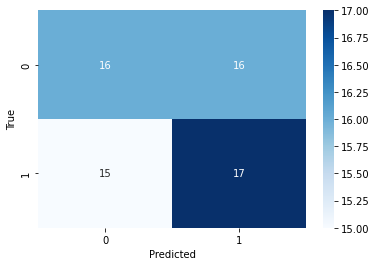

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [152]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.515625
